Import relevant packages here.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [5]:
data = 'C:/users/chaja/Downloads/cf_data.csv '
df = pd.read_csv(data, encoding = 'ISO-8859-1')
df

,dv,s,a
0,-0.743240,53.5427,1.242570
1,-0.557230,53.6120,1.777920
2,-0.454769,53.6541,0.544107
3,-0.525396,53.7030,-0.294755
4,-0.601285,53.7592,-0.290961
...,...,...,...
73903,5.198740,116.1390,-0.795081
73904,5.104280,115.6270,-0.314263
73905,5.137640,115.1180,0.232283
73906,5.153480,114.5990,0.262078


In the ensuing, you will use <code>numpy</code>.

Lets create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [17]:
dv = np.linspace(-10, 10, num = 41)
s = np.linspace(0, 200, num = 21 )
a = np.zeros((len(dv), len(s)))
print(a)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [7]:
df_dv =df.dv
DV = df.dv.to_numpy()
df_s =df.s
S = df.s.to_numpy()
df_a =df.a
A = df.a.to_numpy() 

Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [32]:
N =73908
w= np.zeros(N)
w_DV = np.zeros(N)

for i in range(41):
    for j in range(21):
        for k in range(N):
            w_DV[k] = np.exp(-(abs(DV[k]-dv[i]))/1.5-(abs(S[k]-s[j]))/30)
            w[k] = w_DV[k]*A[k]
        w_weighted = sum(w)/sum(w_DV)
        a[i, j]= w_weighted     
    print(f' Percentage is: {(i + 1)/len(dv) * 100:.1f}%')   


 Percentage is: 2.4%
 Percentage is: 4.9%
 Percentage is: 7.3%
 Percentage is: 9.8%
 Percentage is: 12.2%
 Percentage is: 14.6%
 Percentage is: 17.1%
 Percentage is: 19.5%
 Percentage is: 22.0%
 Percentage is: 24.4%
 Percentage is: 26.8%
 Percentage is: 29.3%
 Percentage is: 31.7%
 Percentage is: 34.1%
 Percentage is: 36.6%
 Percentage is: 39.0%
 Percentage is: 41.5%
 Percentage is: 43.9%
 Percentage is: 46.3%
 Percentage is: 48.8%
 Percentage is: 51.2%
 Percentage is: 53.7%
 Percentage is: 56.1%
 Percentage is: 58.5%
 Percentage is: 61.0%
 Percentage is: 63.4%
 Percentage is: 65.9%
 Percentage is: 68.3%
 Percentage is: 70.7%
 Percentage is: 73.2%
 Percentage is: 75.6%
 Percentage is: 78.0%
 Percentage is: 80.5%
 Percentage is: 82.9%
 Percentage is: 85.4%
 Percentage is: 87.8%
 Percentage is: 90.2%
 Percentage is: 92.7%
 Percentage is: 95.1%
 Percentage is: 97.6%
 Percentage is: 100.0%


The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

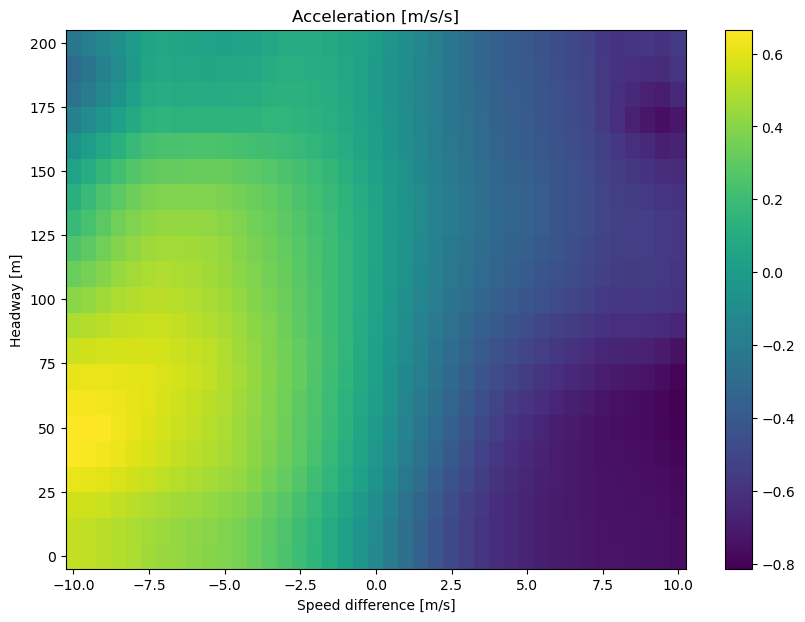

In [33]:
X, Y = np.meshgrid(dv, s)
axs = plt.axes()
p = axs.pcolor(X, Y, a.T, shading='nearest')
axs.set_title('Acceleration [m/s/s]')
axs.set_xlabel('Speed difference [m/s]')
axs.set_ylabel('Headway [m]')
axs.figure.colorbar(p);
axs.figure.set_size_inches(10, 7)

In [ ]:
'It is logical. You can see that in the figure. You can see it in the corners'